## Load dataset sebaran_v2

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
import time

from folium import plugins
from selenium import webdriver
from IPython.display import display

In [142]:
dataset = pd.read_json("https://covid19-public.digitalservice.id/api/v1/sebaran_v2/jabar")
dataset.to_json(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Junior Data Analyst Dinas Informatika dan Komunikasi Jawa Barat Jawa Barat\File Dokumentasi\sebaran_v2_jabar.json")

display(dataset["data"].keys())
# display(dataset["data"]["content"])


Index(['content', 'metadata'], dtype='object')

In [143]:
data = pd.DataFrame(dataset["data"]["content"])
print("Shape of dataset = %d Baris & %d Kolom"%data.shape)
print("Mengecek Jumlah missing Value : ?")
display(data.isnull().sum())
display(data.head())

Shape of dataset = 100 Baris & 22 Kolom
Mengecek Jumlah missing Value : ?


id                                     0
kode_kab                              24
nama_kab                               0
kode_kec                              24
nama_kec                               0
kode_kel                              24
nama_kel                               0
status                                 0
stage                                  0
umur                                   0
gender                                 1
longitude                             24
latitude                              24
tanggal_konfirmasi                     0
tanggal_update                         0
current_location_type                  0
current_location_district_code       100
current_location_subdistrict_code    100
current_location_village_code        100
current_location_address             100
report_source                        100
tanggal_update_nasional                0
dtype: int64

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,...,latitude,tanggal_konfirmasi,tanggal_update,current_location_type,current_location_district_code,current_location_subdistrict_code,current_location_village_code,current_location_address,report_source,tanggal_update_nasional
0,from_manual_63405,3216,Kabupaten Bekasi,3216021,Serang Baru,3216021007,Sukasari,CONFIRMATION,Selesai,44.0,...,-6.382,2020-12-09,2020-12-22,Rumah Sakit Siloam Sentosa,None,None,None,None,None,2020-12-11
1,from_manual_63406,3216,Kabupaten Bekasi,3216021,Serang Baru,3216021007,Sukasari,CONFIRMATION,Selesai,47.0,...,-6.382,2020-12-09,2020-12-22,Rumah Sakit Siloam Sentosa,None,None,None,None,None,2020-12-11
2,from_manual_150665,None,Kota Bekasi,None,Gunung Putri,None,Bojong Nangka,CONFIRMATION,Selesai,40.0,...,NaN,2021-01-25,2021-02-15,Rumah Sakit Umum Mitra Keluarga Cibubur,None,None,None,None,None,2021-02-01
3,from_manual_62823,3216,Kabupaten Bekasi,3216021,Serang Baru,3216021002,Sukaragam,CONFIRMATION,Selesai,38.0,...,-6.393,2020-12-08,2020-12-22,SELF ISOLATION,None,None,None,None,None,2020-12-10
4,from_manual_62886,3216,Kabupaten Bekasi,3216021,Serang Baru,3216021002,Sukaragam,CONFIRMATION,Selesai,23.0,...,-6.393,2020-12-08,2020-12-22,Rumah Sakit Umum Harapan Mulia,None,None,None,None,None,2020-12-10


## Membuat new_data

In [144]:
new_data = data[["id","status","stage","nama_kab","nama_kec","nama_kel","longitude","latitude"]].copy()
display(new_data.head())
display(new_data["stage"].value_counts())

,id,status,stage,nama_kab,nama_kec,nama_kel,longitude,latitude
0,from_manual_63405,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382
1,from_manual_63406,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382
2,from_manual_150665,CONFIRMATION,Selesai,Kota Bekasi,Gunung Putri,Bojong Nangka,NaN,NaN
3,from_manual_62823,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393
4,from_manual_62886,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393


Selesai      99
Meninggal     1
Name: stage, dtype: int64

### Fix format kolom id

In [145]:
display(new_data["id"].value_counts())

from_manual_63405     1
from_manual_150726    1
from_manual_150741    1
from_manual_179923    1
from_manual_150739    1
                     ..
from_manual_70096     1
from_manual_69342     1
from_manual_71097     1
from_manual_71091     1
from_manual_298999    1
Name: id, Length: 100, dtype: int64

In [146]:
new_data["id"] = new_data["id"].apply(lambda x : x.split("_")[2])

## Mengecek total missing value

In [147]:
total_missing_value = new_data.isnull().sum()
display(total_missing_value)

id            0
status        0
stage         0
nama_kab      0
nama_kec      0
nama_kel      0
longitude    24
latitude     24
dtype: int64

### Drop rows yang mengandung missing value

In [148]:
new_data = new_data.dropna()
print("Mengecek Missing Value ? ")
display(new_data.isnull().sum())

Mengecek Missing Value ? 


id           0
status       0
stage        0
nama_kab     0
nama_kec     0
nama_kel     0
longitude    0
latitude     0
dtype: int64

## Membuat kolom status resiko

In [149]:
display(new_data["nama_kab"].value_counts())

Kabupaten Bekasi    30
Kota Bekasi         21
Kota Sukabumi       19
Kabupaten Ciamis     4
Kabupaten Garut      2
Name: nama_kab, dtype: int64

In [150]:
def status_resiko(data, x):
    data_kolom = list(data["nama_kab"].unique())
    if x in data_kolom:
        return "RESIKO RENDAH"

new_data["status_resiko"] = new_data["nama_kab"].apply(lambda x : status_resiko(new_data, x))

In [151]:
display(new_data.head())
display(new_data["status_resiko"].value_counts())

,id,status,stage,nama_kab,nama_kec,nama_kel,longitude,latitude,status_resiko
0,63405,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH
1,63406,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH
3,62823,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH
4,62886,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH
5,64319,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH


RESIKO RENDAH    76
Name: status_resiko, dtype: int64

In [152]:
new_data = new_data.reset_index(drop=True)
display(new_data.head())

,id,status,stage,nama_kab,nama_kec,nama_kel,longitude,latitude,status_resiko
0,63405,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH
1,63406,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH
2,62823,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH
3,62886,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH
4,64319,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH


## Analisa Status berdasarkan Kabupaten

In [153]:
display(new_data["status"].value_counts())

CONFIRMATION    76
Name: status, dtype: int64

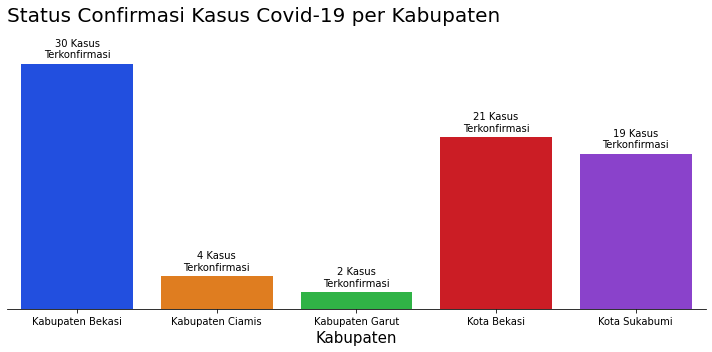

In [154]:
confrimation_status_kab = new_data.groupby(["nama_kab"])["status"].count().reset_index()
fig, axs = plt.subplots(1, 1, figsize=(10,5))
sns.barplot(data=confrimation_status_kab, x="nama_kab", y="status", palette="bright", ax=axs)
axs.set_title("Status Confirmasi Kasus Covid-19 per Kabupaten", fontsize=20, loc="left", pad=30)
axs.set_xlabel("Kabupaten", fontsize=15)
axs.yaxis.set_visible(False)
for p in axs.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axs.annotate(
                 "{} Kasus\nTerkonfirmasi".format(int(height)),
                 xy=(x + width/2, height),
                 ha="center",
                 va="center",
                 xytext=(0, 15),
                 textcoords="offset points"
                )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.savefig("../image/confrimation_status_kab.png", dpi=300)
plt.show()

## Analisa Stage berdasarkan Kabupaten

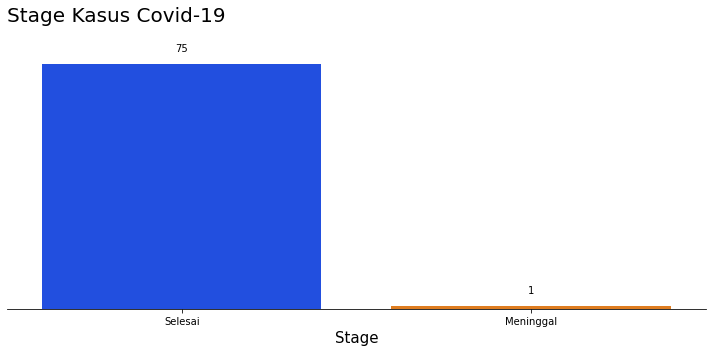

In [155]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(data=new_data, x="stage", palette="bright", ax=axs)
axs.set_title("Stage Kasus Covid-19", fontsize=20, loc="left", pad=30)
axs.set_xlabel("Stage", fontsize=15)
axs.yaxis.set_visible(False)
for p in axs.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axs.annotate(
                 "{}".format(int(height)),
                 xy=(x + width/2, height),
                 ha="center",
                 va="center",
                 xytext=(0, 15),
                 textcoords="offset points"
                )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.savefig("../image/stage_status_kab.png", dpi=300)
plt.show()

In [156]:
def stage_color(x):
    if x == "Selesai":
        return "green"
    else:
        return "red"

new_data["stage_color"] = new_data["stage"].apply(lambda x: stage_color(x))

display(new_data.head())

,id,status,stage,nama_kab,nama_kec,nama_kel,longitude,latitude,status_resiko,stage_color
0,63405,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH,green
1,63406,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukasari,107.104,-6.382,RESIKO RENDAH,green
2,62823,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH,green
3,62886,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH,green
4,64319,CONFIRMATION,Selesai,Kabupaten Bekasi,Serang Baru,Sukaragam,107.108,-6.393,RESIKO RENDAH,green


## Membuat Map

In [157]:
location = new_data[["nama_kab","longitude","latitude","status","stage_color"]].copy()
display(list(new_data["nama_kab"].unique()))
display(new_data["nama_kab"].value_counts())
display(location.head())

['Kabupaten Bekasi',
 'Kabupaten Ciamis',
 'Kota Sukabumi',
 'Kota Bekasi',
 'Kabupaten Garut']

Kabupaten Bekasi    30
Kota Bekasi         21
Kota Sukabumi       19
Kabupaten Ciamis     4
Kabupaten Garut      2
Name: nama_kab, dtype: int64

,nama_kab,longitude,latitude,status,stage_color
0,Kabupaten Bekasi,107.104,-6.382,CONFIRMATION,green
1,Kabupaten Bekasi,107.104,-6.382,CONFIRMATION,green
2,Kabupaten Bekasi,107.108,-6.393,CONFIRMATION,green
3,Kabupaten Bekasi,107.108,-6.393,CONFIRMATION,green
4,Kabupaten Bekasi,107.108,-6.393,CONFIRMATION,green


In [158]:
jabar_map = folium.Map(
                        location=[-6.943097,  107.633545],
                        zoom_start = 8.5,
                        control_scale=True
                      )

In [159]:
display(location["nama_kab"].value_counts())

Kabupaten Bekasi    30
Kota Bekasi         21
Kota Sukabumi       19
Kabupaten Ciamis     4
Kabupaten Garut      2
Name: nama_kab, dtype: int64

In [160]:
for index, location_info in location.iterrows():
    folium.Marker(
                  [location_info["latitude"], location_info["longitude"]],
                  popup=location_info["nama_kab"],
                  tooltip=location_info["nama_kab"],
                  icon=folium.Icon(color=location_info["stage_color"])
                  ).add_to(jabar_map)

# def style_geojson():

# for data in data_lat_long:
#     folium.Circle(
#                     location=[data[0], data[1]],
#                     radius=data[2],
#                     fill_color="yellow",
#                  ).add_to(jabar_map)
style = {'fillColor': 'yellow', 'lineColor': 'orange', "fill-opacity":0.2, "stroke-width":1}
folium.GeoJson(data="gejson_fix.geojson", style_function=lambda x:style).add_to(jabar_map)
jabar_map

In [161]:
# nama_map = "..\File Map\confirmation_map.html"
# jabar_map.save(nama_map)

# mapUrl = "{}\{}".format(os.getcwd(), nama_map)

# driver = webdriver.Chrome("C:\WebDrivers\chromedriver")
# driver.get(mapUrl)

# time.sleep(5)

# driver.save_screenshot('../Image/confirmation_map.png')
# driver.quit()

In [162]:
# nama_map = "..\File Map\stage_map.html"
# jabar_map.save(nama_map)

# mapUrl = "{}\{}".format(os.getcwd(), nama_map)

# driver = webdriver.Chrome("C:\WebDrivers\chromedriver")
# driver.get(mapUrl)

# time.sleep(5)

# driver.save_screenshot('../Image/stage_map.png')
# driver.quit()

In [163]:
# nama_map = "..\File Map\status_resiko_map.html"
# jabar_map.save(nama_map)

# mapUrl = "{}\{}".format(os.getcwd(), nama_map)

# driver = webdriver.Chrome("C:\WebDrivers\chromedriver")
# driver.get(mapUrl)

# time.sleep(5)

# driver.save_screenshot('../Image/status_resiko_map.png')
# driver.quit()

C:\Users\MYHOME~1\AppData\Local\Temp/ipykernel_10316/29158055.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\WebDrivers\chromedriver")
